In [3]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
import numpy as np
%matplotlib inline

In [4]:
def read_csv(fname):
    #f = lambda x : json.loads(x.replace("'","\""))
    #df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    df = pd.read_csv(fname, index_col=0)
    return df

In [5]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

In [6]:
keys = {'all': ['ma_window', 'sensor_type', 'n_record', 'n_train', 'ms_interval'],
        'kNN': ['n_neighbors', 'algorithm'],
        'LOF': ['n_neighbors', 'algorithm'],
        'k-means': ['n_clusters', 'max_iter'],
        'NN': ['num_of_hidden_nodes', 'num_of_training_epochs', 'size_of_mini_batch', 'learning_rate'],
       }

def df_values(_df):
    print('--- common')
    for c in keys['all']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[c].unique()))

    print('--- kNN')
    for c in keys['kNN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='kNN'][c].unique()))
    
    print('--- LOF')
    for c in keys['LOF']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='LOF'][c].unique()))
    
    print('--- k-means')
    for c in keys['k-means']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='k-means'][c].unique()))
    
    print('--- NN')
    for c in keys['NN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='NN'][c].unique()))

In [7]:
def show_graph(df_list, columns, x_title, y_title):
    df_list = [df[[x_title, y_title]] for df in df_list]
    
    df_list = [df.rename(index=str, columns={y_title: c}) for df, c in zip(df_list, columns)]
    
    merge_df = df_list[0]
    for df in df_list[1:]:
        merge_df = merge_df.merge(df, on=[x_title], how='outer')
    
    v = merge_df[columns].values
    v_max, v_min = np.nanmax(v), np.nanmin(v)
    v_range = v_max - v_min
    
    display(merge_df)
    merge_df.plot.bar(x=x_title, ylim=[v_min - v_range*0.1, v_max + v_range*0.2])

,n_train,kNN,LOF,k-menas,NN
0,5,0.934722,0.904306,0.944074,0.945046
1,10,0.947546,0.943102,0.944259,0.947685
2,20,0.962176,0.909583,0.957176,0.961389
3,100,0.953565,0.902639,0.952407,0.955648
4,1,NaN,NaN,0.906111,0.898519


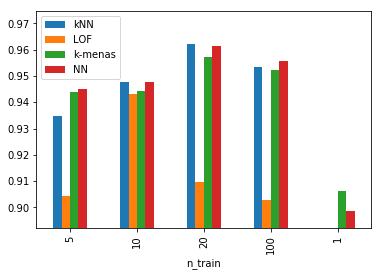

In [7]:
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
df = read_csv(csv_file)

_d = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))
]
#df_values(_d)

_d_knn = _d[(_d['type']=='kNN') & (_d['n_neighbors'] == 5)]
_d_nn  = _d[(_d['type']=='NN') & (_d['num_of_hidden_nodes'] == 32)]
_d_lof = _d[(_d['type']=='LOF') & (_d['n_neighbors'] == 5)]
_d_kms = _d[(_d['type']=='k-means') & (_d['n_clusters'] == 1)]

show_graph([_d_knn, _d_lof, _d_kms, _d_nn], ['kNN',  'LOF', 'k-menas', 'NN'], 'n_train', 'auc')

total 25461 results
--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]]']
n_record                                [-20  -5  -2  -1   0   1   2   5  20]
n_train                                 [5]
ms_interval                             [20]
--- kNN
n_neighbors                             [ 1.  3.  5.]
algorithm                               ['ball_tree']
--- LOF
n_neighbors                             []
algorithm                               []
--- k-means
n_clusters                              []
max_iter                                []
--- NN
num_of_hidden_nodes                     []
num_of_training_epochs                  []
size_of_mini_batch                      []
learning_rate                           []


,n_neighbors,-20,-5,-2,-1,0,1,2,5,20
0,1.0,0.998657,0.992917,0.980694,0.974907,0.961157,0.966620,0.969722,0.974537,0.984398
1,3.0,0.999120,0.993148,0.983704,0.976157,0.962639,0.968380,0.968935,0.974630,0.986389
2,5.0,0.998843,0.990417,0.982130,0.975093,0.962361,0.972824,0.973843,0.970972,0.986667


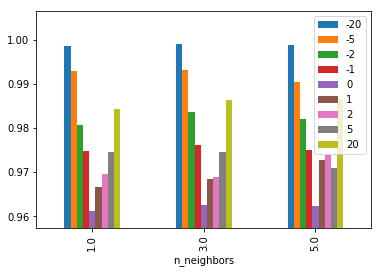

In [18]:
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

_d = df[
    (df['n_train'] == 5) &
    (df['ma_window'] == 1) &
    (df['ms_interval'] == 20) &
#    (df['num_of_hidden_nodes'] == 4) &
    (df['sensor_type'].apply(lambda x: 'user' in x))
]

_d  = _d[(_d['type']=='kNN')]
df_values(_d)

_d_n_record = [_d[_d['n_record'] == x] for x in _d['n_record'].unique()]

show_graph(_d_n_record, list(_d['n_record'].unique()), 'n_neighbors', 'auc')

total 25461 results
--- common
ma_window                               [1]
sensor_type                             ['["rssi.a", "rssi.b"]'
 '["rssi.a", "rssi.b", ["acceleration.x", "acceleration.y", "acceleration.z"]]'
 '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]'
 '["rssi.a", "rssi.b", ["magneticField.x", "magneticField.y", "magneticField.z"]]'
 '["rssi.a", "rssi.b", ["attitude.roll", "attitude.pitch", "attitude.yaw"]]'
 '["rssi.a", "rssi.b", ["rotationRate.x", "rotationRate.y", "rotationRate.z"]]'
 '["rssi.a", "rssi.b", ["gravity.x", "gravity.y", "gravity.z"]]'
 '["rssi.a", "rssi.b", ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]]']
n_record                                [-20  -5  -2  -1   0   1   2   5  20]
n_train                                 [5]
ms_interval                             [20]
--- kNN
n_neighbors                             [ 3.]
algorithm                               ['ball_tree']
--- LOF
n_nei

,sensor_type,-20,-5,-2,-1,0,1,2,5,20
0,"[""rssi.a"", ""rssi.b""]",0.960972,0.936343,0.911065,0.904421,0.872199,0.876296,0.891806,0.936065,0.957269
1,"[""rssi.a"", ""rssi.b"", [""acceleration.x"", ""accel...",0.613889,0.612454,0.596620,0.592593,0.580880,0.581065,0.579907,0.580139,0.606111
2,"[""rssi.a"", ""rssi.b"", [""gyro.rotationRate.x"", ""...",0.986343,0.973611,0.959907,0.949491,0.941435,0.938009,0.948611,0.952963,0.982917
3,"[""rssi.a"", ""rssi.b"", [""magneticField.x"", ""magn...",0.457407,0.475972,0.470324,0.468380,0.461435,0.456250,0.438056,0.443519,0.404954
4,"[""rssi.a"", ""rssi.b"", [""attitude.roll"", ""attitu...",0.725370,0.719028,0.710324,0.708102,0.708796,0.711019,0.719213,0.723426,0.764861
5,"[""rssi.a"", ""rssi.b"", [""rotationRate.x"", ""rotat...",0.984769,0.973935,0.960926,0.951389,0.943750,0.949213,0.955324,0.963750,0.985324
6,"[""rssi.a"", ""rssi.b"", [""gravity.x"", ""gravity.y""...",0.501667,0.511435,0.917870,0.518333,0.875463,0.524769,0.899907,0.530046,0.546574
7,"[""rssi.a"", ""rssi.b"", [""userAcceleration.x"", ""u...",0.999120,0.993148,0.983704,0.976157,0.962639,0.968380,0.968935,0.974630,0.986389


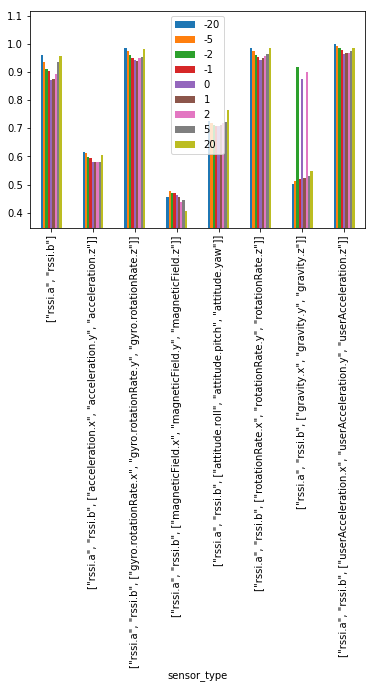

In [22]:
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

_d = df[
    (df['n_train'] == 5) &
    (df['ma_window'] == 1) &
    (df['ms_interval'] == 20) &
#    (df['num_of_hidden_nodes'] == 4) &
    (df['n_neighbors'] == 3)
#    (df['sensor_type'].apply(lambda x: 'user' in x))
]

_d  = _d[(_d['type']=='kNN')]
df_values(_d)

_d_n_record = [_d[_d['n_record'] == x] for x in _d['n_record'].unique()]

show_graph(_d_n_record, list(_d['n_record'].unique()), 'sensor_type', 'auc')

In [123]:

##### remove sensor type of iOS

#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
#csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

df = df[~(df['sensor_type'].apply(lambda x: 'acceleration' in x))]
df = df[~(df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))]
df = df[~(df['sensor_type'].apply(lambda x: 'magneticField' in x))]
df = df[~(df['sensor_type'].apply(lambda x: 'attitude' in x))]
df = df[~(df['sensor_type'].apply(lambda x: 'rotationRate' in x))]
df = df[~(df['sensor_type'].apply(lambda x: 'gravity.x' in x))]
df = df[~(df['sensor_type'].apply(lambda x: 'userAcceleration' in x))]

df.to_csv(csv_file)

total 20150 results


In [44]:
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
df = read_csv(csv_file)
print(len(df))
df_values(df)

18009
--- common
ma_window                               [1 3]
sensor_type                             ['["rssi.a", "rssi.b"]'
 '["rssi.a", "rssi.b", ["acceleration.x", "acceleration.y", "acceleration.z"]]'
 '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]'
 '["rssi.a", "rssi.b", ["magneticField.x", "magneticField.y", "magneticField.z"]]'
 '["rssi.a", "rssi.b", ["attitude.roll", "attitude.pitch", "attitude.yaw"]]'
 '["rssi.a", "rssi.b", ["rotationRate.x", "rotationRate.y", "rotationRate.z"]]'
 '["rssi.a", "rssi.b", ["gravity.x", "gravity.y", "gravity.z"]]'
 '["rssi.a", "rssi.b", ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]]']
n_record                                [-20  -5  -1   0   1   5  20]
n_train                                 [  1   5  10  20 100]
ms_interval                             [ 20  60 100]
--- kNN
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ba

In [52]:
csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
df = read_csv(csv_file)
df = df[~df['sensor_type'].apply(lambda x: 'acceleration' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'magneticField.x' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'attitude.roll' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'rotationRate.x' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'gravity.x' in x)]
df = df[~df['sensor_type'].apply(lambda x: 'userAcceleration.x' in x)]
print(len(df))
df_values(df)
df.to_csv(csv_file)

28618
--- common
ma_window                               [1 3]
sensor_type                             ['["rssi.a", "rssi.b"]'
 '["rssi.a", "rssi.b", ["linear_accel[0]", "linear_accel[1]", "linear_accel[2]"]]'
 '["rssi.a", "rssi.b", ["accelerometer[0]", "accelerometer[1]", "accelerometer[2]"]]'
 '["rssi.a", "rssi.b", ["gravity[0]", "gravity[1]", "gravity[2]"]]'
 '["rssi.a", "rssi.b", ["gyro[0]", "gyro[1]", "gyro[2]"]]'
 '["rssi.a", "rssi.b", ["rotation[0]", "rotation[1]", "rotation[2]"]]'
 '["rssi.a", "rssi.b", ["game_rotation[0]", "game_rotation[1]", "game_rotation[2]"]]'
 '["rssi.a", "rssi.b", ["magnetic[0]", "magnetic[1]", "magnetic[2]"]]'
 '["rssi.a", "rssi.b", "pressure"]']
n_record                                [-20  -5  -2  -1   0   1   2   5  20]
n_train                                 [  1   5  10  20 100]
ms_interval                             [ 20  60 100]
--- kNN
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_t

In [46]:
csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
#csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
#csv_file = 'test_record_01_11_01__^01_11__^01_1[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

df_values(df)

total 50717 results
--- common
ma_window                               [1 3]
sensor_type                             ['["rssi.a", "rssi.b"]'
 '["rssi.a", "rssi.b", ["linear_accel[0]", "linear_accel[1]", "linear_accel[2]"]]'
 '["rssi.a", "rssi.b", ["accelerometer[0]", "accelerometer[1]", "accelerometer[2]"]]'
 '["rssi.a", "rssi.b", ["gravity[0]", "gravity[1]", "gravity[2]"]]'
 '["rssi.a", "rssi.b", ["gyro[0]", "gyro[1]", "gyro[2]"]]'
 '["rssi.a", "rssi.b", ["rotation[0]", "rotation[1]", "rotation[2]"]]'
 '["rssi.a", "rssi.b", ["game_rotation[0]", "game_rotation[1]", "game_rotation[2]"]]'
 '["rssi.a", "rssi.b", ["magnetic[0]", "magnetic[1]", "magnetic[2]"]]'
 '["rssi.a", "rssi.b", "pressure"]'
 '["rssi.a", "rssi.b", ["acceleration.x", "acceleration.y", "acceleration.z"]]'
 '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]'
 '["rssi.a", "rssi.b", ["magneticField.x", "magneticField.y", "magneticField.z"]]'
 '["rssi.a", "rssi.b", ["attitude.roll", 